In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [5]:
df.shape

(100, 3)

In [6]:
df.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F                        100 non-null    float64
 1   N                        100 non-null    float64
 2   Prprice per square foot  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


### Checking for Null values

In [8]:
df.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

### Splitting the dataset

In [9]:
x = df.iloc[ : , :-1].values
y = df.iloc[ : , -1].values

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0 )

### Training the Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [12]:
reg.fit(x_train, y_train)

LinearRegression()

### Predicting the testing data

In [13]:
y_pred = reg.predict(x_test)
y_pred

array([ 426.09146539,   58.82595194,  671.86958179,   70.59925474,
        655.72394234,  237.66554823,  588.89726222,  571.74180841,
        677.2517328 ,  698.94769006,  751.25407187,  971.69207474,
       1054.21622072, 1151.03617141,  526.05107197,  399.51785749,
        986.38053984,  118.5888131 ,  890.9059235 ,  704.55433467])

### Plotting the Model

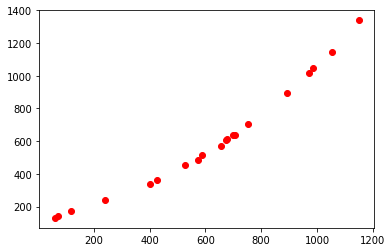

In [14]:
plt.scatter(y_pred, y_test, color='red')

### Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

### Polynomial Prediction

In [16]:
lin_reg.predict(poly_reg.fit_transform(x_test))

array([ 359.0876978 ,  131.76154749,  609.39868272,  148.14556931,
        567.86640606,  237.80774311,  520.77336095,  485.81876329,
        619.69699232,  633.21374031,  703.56589643, 1022.38432924,
       1151.70725436, 1331.57795424,  461.15024703,  340.43099672,
       1040.13880289,  169.46466898,  900.11432697,  635.90759146])